# Оценка страховой стоимости транспортного средства

Первая задача Открытого чемпионата Финансового университета по машинному обучению - 2018

https://www.kaggle.com/c/finunichamp2018-1/leaderboard

In [342]:
import pandas as pd
import numpy as np

In [343]:
train = pd.read_csv('datasets/finu1/insvalue_train.csv')
test = pd.read_csv('datasets/finu1/insvalue_test.csv')
subm = pd.read_csv('datasets/finu1/insvalue_sample.csv')

In [344]:
train['is_train'] = 1
test['is_test'] = 1

df = train.append(test)

df.sample(11)

,column_1,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,...,column_4,column_5,column_6,column_7,column_8,column_9,id,is_test,is_train,target
9690,2,123.0,2,0,56.753996,1,c0,0,a,4.790831,...,b0,b0,44.0,q1,27000.0,6,NaN,NaN,1.0,3.153201e+05
6603,2,123.0,51,0,47.742021,1,c0,0,a,4.772214,...,b0,b0,37.0,q1,1.0,3,NaN,NaN,1.0,4.669868e+05
607,2,123.0,9,6,47.742021,1,c0,0,a,3.096325,...,b0,b0,20.0,q1,37500.0,5,608.0,1.0,NaN,NaN
14832,2,116.0,16,0,52.915733,1,c4,0,c,5.297602,...,b20,b20,56.0,q1,15000.0,7,NaN,NaN,1.0,2.514605e+05
12487,2,105.0,3,0,89.947280,1,c4,0,e,1.509196,...,b37,b37,64.0,q1,6700.0,4,NaN,NaN,1.0,3.767172e+05
5838,1,141.0,14,0,58.025786,1,c3,0,d,0.738331,...,b0,b0,73.0,q1,74000.0,6,NaN,NaN,1.0,5.665062e+05
19117,2,140.0,19,0,83.961901,1,c1,0,c,6.387017,...,b353,b353,31.0,q1,20000.0,5,NaN,NaN,1.0,5.553148e+05
278,1,115.0,24,0,50.337125,1,c1,0,c,7.614102,...,b0,b0,27.0,q1,45000.0,6,NaN,NaN,1.0,3.474754e+05
21804,2,282.0,3,0,98.221331,1,c3,0,j,5.966099,...,b0,b0,0.0,q1,0.0,5,NaN,NaN,1.0,1.561725e+06
7998,2,150.0,5,0,75.467879,1,c4,0,e,4.259877,...,b0,b0,39.0,q1,30000.0,5,NaN,NaN,1.0,5.121935e+05


In [456]:
df['automodel_plus_year'] = df['column_17'].astype(str) + ' ' + df['column_9'].astype(str)
df['automodel_plus_year_mean'] = df.groupby('automodel_plus_year')['target'].transform('mean')

#df['automodel_mean'] = df.groupby('column_17')['target'].transform('mean')
#df['automodel_median'] = df.groupby('column_17')['target'].transform('median')
#df['automodel_max'] = df.groupby('column_17')['target'].transform('max')

df['motorpower_mean'] = df.groupby('column_10')['target'].transform('mean')
df['motorpower_median'] = df.groupby('column_10')['target'].transform('median')
df['motorpower_max'] = df.groupby('column_10')['target'].transform('max')

#df['autoyear_mean'] = df.groupby('column_9')['target'].transform('mean')
#df['autoyear_median'] = df.groupby('column_9')['target'].transform('median')
#df['autoyear_max'] = df.groupby('column_9')['target'].transform('max')

df['diff_cities'] = df['column_4'] == df['column_5']

df['diff_cities'] = df['diff_cities'].apply(lambda x: 1 if x == True else 0)

In [457]:
df

,column_1,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,...,id,is_test,is_train,target,automodel_plus_year,automodel_plus_year_mean,motorpower_mean,motorpower_median,motorpower_max,diff_cities
0,2,249.00,23,1,58.025786,1,0,1,0,3.095619,...,NaN,NaN,1.0,3.105288e+06,0 2,2.667459e+06,1.695884e+06,1.375775e+06,4.833195e+06,1
1,1,123.00,4,3,81.549097,1,1,0,1,1.665975,...,NaN,NaN,1.0,3.752557e+05,1 4,4.727195e+05,3.599816e+05,3.536907e+05,5.098210e+05,1
2,2,181.00,9,0,76.689904,1,2,1,2,4.265557,...,NaN,NaN,1.0,9.910123e+05,2 2,9.568247e+05,7.822977e+05,7.641721e+05,1.199901e+06,1
3,1,211.00,29,0,79.125201,1,0,0,3,5.201468,...,NaN,NaN,1.0,9.389850e+05,3 7,8.966930e+05,9.656960e+05,9.373685e+05,1.606868e+06,0
4,2,209.00,19,0,81.549097,1,3,0,4,6.136154,...,NaN,NaN,1.0,7.761075e+05,4 7,7.807335e+05,8.363415e+05,8.250102e+05,1.047644e+06,1
5,2,170.00,25,0,75.467879,1,3,0,5,4.720411,...,NaN,NaN,1.0,7.622707e+05,5 4,9.232309e+05,6.538379e+05,6.248154e+05,1.396599e+06,1
6,2,125.00,12,0,54.199037,1,3,0,3,6.114002,...,NaN,NaN,1.0,6.568374e+05,3 3,1.310662e+06,6.147728e+05,6.437368e+05,7.832906e+05,1
7,2,180.00,10,0,59.293870,1,0,0,6,3.974413,...,NaN,NaN,1.0,4.073320e+05,6 7,3.220933e+05,8.055131e+05,4.814566e+05,1.937757e+06,1
8,2,241.00,35,3,56.753996,1,3,0,7,1.293768,...,NaN,NaN,1.0,1.124873e+06,7 5,1.395017e+06,1.354049e+06,1.308676e+06,2.090463e+06,1
9,2,181.00,16,1,46.438089,1,3,0,2,0.962209,...,NaN,NaN,1.0,6.701399e+05,2 4,9.990362e+05,7.822977e+05,7.641721e+05,1.199901e+06,1


In [458]:
cols = df.columns
cols

Index(['column_1', 'column_10', 'column_11', 'column_12', 'column_13',
       'column_14', 'column_15', 'column_16', 'column_17', 'column_18',
       'column_2', 'column_3', 'column_4', 'column_5', 'column_6', 'column_7',
       'column_8', 'column_9', 'id', 'is_test', 'is_train', 'target',
       'automodel_plus_year', 'automodel_plus_year_mean', 'motorpower_mean',
       'motorpower_median', 'motorpower_max', 'diff_cities'],
      dtype='object')

In [459]:
for c in cols:
    if df[c].dtype == 'object':
        df[c] = df[c].factorize()[0].astype(np.int64)

In [460]:
df.sample(7)

,column_1,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,...,id,is_test,is_train,target,automodel_plus_year,automodel_plus_year_mean,motorpower_mean,motorpower_median,motorpower_max,diff_cities
6875,2,170.0,14,1,50.337125,1,3,0,5,7.138413,...,NaN,NaN,1.0,6.149432e+05,21,8.008866e+05,6.538379e+05,6.248154e+05,1.396599e+06,1
24221,1,123.0,30,0,66.827923,1,1,0,1,0.913333,...,NaN,NaN,1.0,3.014399e+05,1,4.727195e+05,3.599816e+05,3.536907e+05,5.098210e+05,1
20467,2,224.0,9,1,43.817058,1,0,0,3,5.495467,...,NaN,NaN,1.0,1.382751e+06,6,1.310662e+06,1.246839e+06,1.240941e+06,1.653663e+06,0
1421,1,123.0,0,0,50.337125,1,1,0,8,2.643880,...,NaN,NaN,1.0,4.916390e+05,62,5.164056e+05,3.599816e+05,3.536907e+05,5.098210e+05,0
16692,2,170.0,20,5,74.242880,1,0,0,5,7.261724,...,NaN,NaN,1.0,5.378254e+05,24,6.586667e+05,6.538379e+05,6.248154e+05,1.396599e+06,1
4445,2,115.0,24,2,89.947280,1,3,0,6,1.988884,...,NaN,NaN,1.0,3.837591e+05,30,5.488644e+05,3.326777e+05,3.184281e+05,5.473443e+05,1
8574,1,105.0,22,0,56.753996,1,0,0,3,4.087346,...,NaN,NaN,1.0,4.324490e+05,27,9.498199e+05,3.540578e+05,3.315927e+05,7.567211e+05,1


In [478]:
X_train = df[df['is_train'] == 1].drop('target', axis=1)[['column_11','diff_cities','automodel_plus_year_mean', 'motorpower_mean','automodel_plus_year','column_10','motorpower_max', 'column_8']]
X_test = df[df['is_test'] == 1].drop('target', axis=1)[['column_11','diff_cities','automodel_plus_year_mean', 'motorpower_mean','automodel_plus_year','column_10','motorpower_max', 'column_8']]

y_train = df[df['is_train'] == 1]['target']

In [479]:
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_te = X_test

X_tr.shape, X_te.shape, X_va.shape

((19608, 8), (3662, 8), (4903, 8))

In [480]:
cat_cols = []

cols = X_train.columns

for c in cols:
    if df[c].dtype == 'int64':
        cat_cols.append(c)

In [481]:
cat_cols

['column_11', 'diff_cities', 'automodel_plus_year']

In [482]:
import lightgbm as lgb
import gc

tr_data = lgb.Dataset(X_tr, label=y_tr, categorical_feature=cat_cols)
va_data = lgb.Dataset(X_va, label=y_va, categorical_feature=cat_cols, reference=tr_data)

gc.collect()

# Train the model
parameters = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mean_absolute_percentage_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    #'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 50,
}


model = lgb.train(parameters,
                  tr_data,
                  valid_sets=va_data,
                  num_boost_round=50000,
                  early_stopping_rounds=120,
                  verbose_eval=50)

/home/oleg/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/oleg/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:681: UserWarning: categorical_feature in param dict is overrided.
  warnings.warn('categorical_feature in param dict is overrided.')


Training until validation scores don't improve for 120 rounds.
[50]	valid_0's mape: 0.67536
[100]	valid_0's mape: 0.667749
[150]	valid_0's mape: 0.660233
[200]	valid_0's mape: 0.652736
[250]	valid_0's mape: 0.645246
[300]	valid_0's mape: 0.637735
[350]	valid_0's mape: 0.630288
[400]	valid_0's mape: 0.622895
[450]	valid_0's mape: 0.615592
[500]	valid_0's mape: 0.608367
[550]	valid_0's mape: 0.60119
[600]	valid_0's mape: 0.593975
[650]	valid_0's mape: 0.586826
[700]	valid_0's mape: 0.579725
[750]	valid_0's mape: 0.572618
[800]	valid_0's mape: 0.565593
[850]	valid_0's mape: 0.558524
[900]	valid_0's mape: 0.551434
[950]	valid_0's mape: 0.544463
[1000]	valid_0's mape: 0.53757
[1050]	valid_0's mape: 0.530718
[1100]	valid_0's mape: 0.523892
[1150]	valid_0's mape: 0.517087
[1200]	valid_0's mape: 0.510255
[1250]	valid_0's mape: 0.503526
[1300]	valid_0's mape: 0.496791
[1350]	valid_0's mape: 0.490123
[1400]	valid_0's mape: 0.483497
[1450]	valid_0's mape: 0.476856
[1500]	valid_0's mape: 0.47027
[

[12750]	valid_0's mape: 0.10296
[12800]	valid_0's mape: 0.102897
[12850]	valid_0's mape: 0.102804
[12900]	valid_0's mape: 0.102706
[12950]	valid_0's mape: 0.102579
[13000]	valid_0's mape: 0.102525
[13050]	valid_0's mape: 0.102439
[13100]	valid_0's mape: 0.102379
[13150]	valid_0's mape: 0.10223
[13200]	valid_0's mape: 0.1022
[13250]	valid_0's mape: 0.102088
[13300]	valid_0's mape: 0.102036
[13350]	valid_0's mape: 0.101953
[13400]	valid_0's mape: 0.101901
[13450]	valid_0's mape: 0.101846
[13500]	valid_0's mape: 0.101762
[13550]	valid_0's mape: 0.101724
[13600]	valid_0's mape: 0.101667
[13650]	valid_0's mape: 0.101543
[13700]	valid_0's mape: 0.101484
[13750]	valid_0's mape: 0.101419
[13800]	valid_0's mape: 0.101377
[13850]	valid_0's mape: 0.101321
[13900]	valid_0's mape: 0.101231
[13950]	valid_0's mape: 0.101186
[14000]	valid_0's mape: 0.101132
[14050]	valid_0's mape: 0.101076
[14100]	valid_0's mape: 0.100975
[14150]	valid_0's mape: 0.100869
[14200]	valid_0's mape: 0.100847
[14250]	valid_

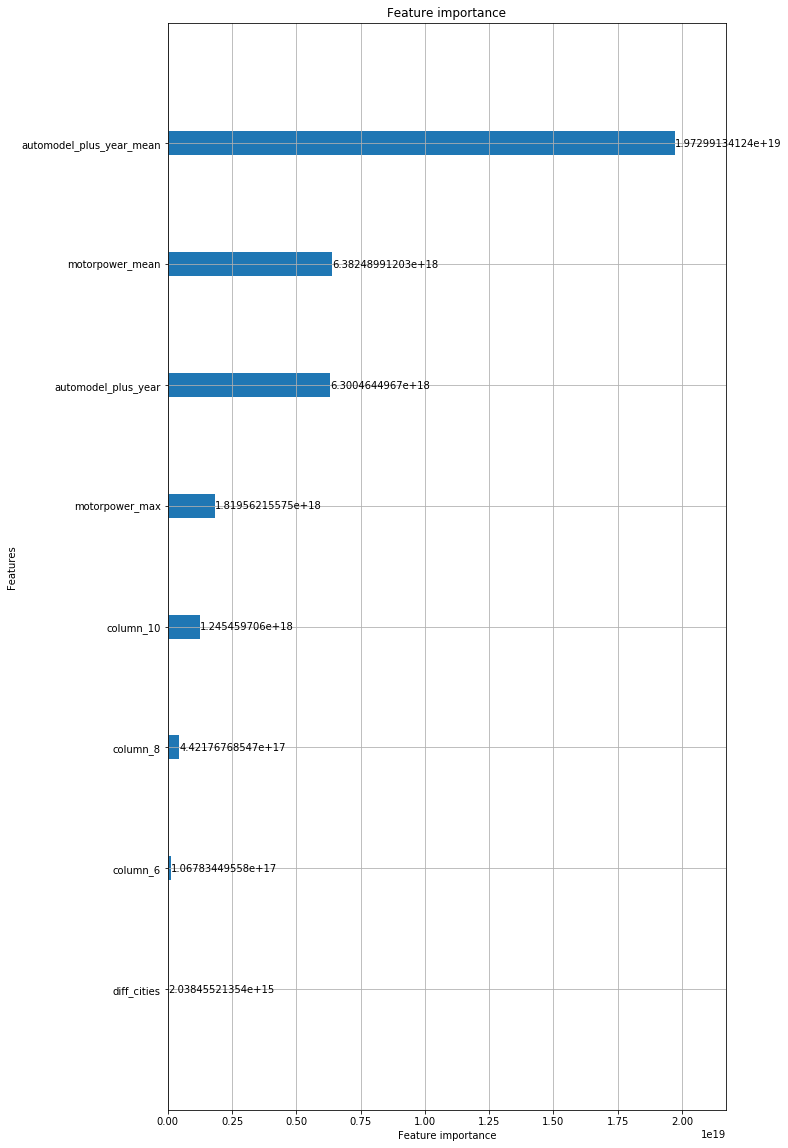

In [477]:
%matplotlib inline
lgb.plot_importance(model, importance_type='gain', figsize=(10,20))

In [469]:
y_te = model.predict(X_test)

In [470]:
subm['target'] = y_te
subm.head()

,id,target
0,1,7.163806e+05
1,2,9.284721e+05
2,3,7.062099e+05
3,4,1.375589e+06
4,5,5.907084e+05


In [471]:
subm.to_csv('finu1.csv', index=False)